# Correlation between COVID-19 and Anxiety and Depression in the US 
This notebook brings in the COVID-19 confirmed cases and deaths, along with the Indicators of Anxiety and Depression (IAD) and analyzes the relationship between these variables.<br>
Findings:
1. The number of confirmed COVID-19 cases (per week) & the anxiety/depression levels (IAD%) are **highly** correlated at the National (US) level:<br> - US r-value is 0.86 <br>
<br>
2. The number of confirmed COVID-19 cases (per week in NY and CA) & the anxiety/depression levels (IAD% in NY & CA) are **moderately** correlated than at the national level:<br> - NY r-value is 0.56 <br> - CA r-value is 0.64 <br>
<br>    
3. The number of deaths (per week) & the anxiety/depression levels (IAD%) are **weakly** correlated: <br> - US r-value is 0.44 <br> - NY r-value is 0.36 <br> - CA r-value is 0.41
    


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import scipy.stats as st
from scipy.stats import linregress

In [2]:
# Read combined csv file of US COVID cases & IAD percentages
input_data_file = "mt_data/clean_covid_iad_scatter_in.csv"
combined_df = pd.read_csv(input_data_file)


In [3]:
combined_df.head(100)

,Date,NY Actual Cases,NY Actual Deaths,NY IAD%,CA Actual Cases,CA Actual Deaths,CA IAD%,US Actual Cases,US Actual Deaths,US IAD%
0,4/29/2020,41496,3503,41.4,11104,533,37.4,202201,13653,35.9
1,5/6/2020,24200,3020,41.4,12315,525,37.4,184825,13098,35.9
2,5/13/2020,19702,1669,36.9,12326,522,34.4,167262,10761,34.4
3,5/20/2020,14043,1161,34.9,12916,502,38.8,160920,9104,33.9
4,5/27/2020,10592,783,34.4,14923,448,36.2,147278,7381,34.3
5,6/3/2020,7767,526,34.8,18707,477,38.6,148451,6572,35.5
6,6/10/2020,11117,491,38.6,18504,415,39.7,150967,5934,36.1
7,6/17/2020,4854,341,32.9,20824,432,37.9,161430,4662,36.0
8,6/24/2020,4520,270,32.9,33207,424,39.1,218524,4173,36.1
9,7/1/2020,4472,790,34.3,42435,458,38.1,304796,6213,37.8


## IAD% vs. confirmed COVID cases in the US

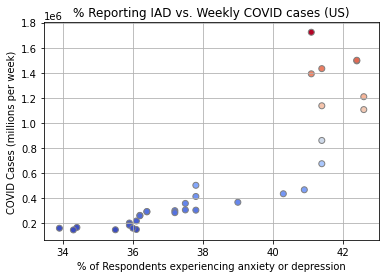

In [4]:
# Generate a scatter plot using IAD% and COVID Confirmed Cases in the US
x_axis = combined_df['US IAD%']
y_axis = combined_df['US Actual Cases']
plt.scatter(x_axis,y_axis, c=y_axis, cmap='coolwarm',edgecolor='gray')

# add labels and title
plt.xlabel('% of Respondents experiencing anxiety or depression')
plt.ylabel('COVID Cases (millions per week)')
plt.title(f'% Reporting IAD vs. Weekly COVID cases (US)')
plt.grid()
plt.savefig('mt_data/IAD_cases_US_scatter.png')
plt.show()


## %IAD vs. Confirmed COVID Cases in US - linear regression

The r-value is:0.86.


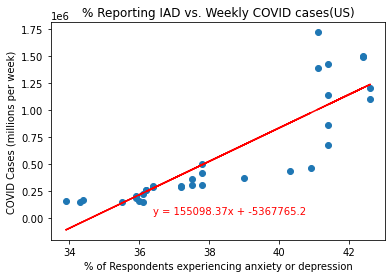

In [5]:
# Calculate the correlation coefficient and linear regression model 
# for IAD % and COVID confirmed cases in the US

correlation = st.pearsonr(combined_df['US IAD%'],combined_df['US Actual Cases'])
print(f'The r-value is:{round(correlation[0],2)}.')

# Calculate the linear regression model for these two variables
x_values = combined_df['US IAD%']
y_values = combined_df['US Actual Cases']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot the data on the scatter plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Annotate the regression line
plt.annotate(line_eq,(36.4,35627),fontsize=10,color="red")
plt.xlabel('% of Respondents experiencing anxiety or depression')
plt.ylabel('COVID Cases (millions per week)')
plt.title(f'% Reporting IAD vs. Weekly COVID cases(US)')
# plt.grid()
plt.savefig('mt_data/IAD_cases_US_regression.png')
plt.show()


## IAD% vs. COVID Deaths in the US

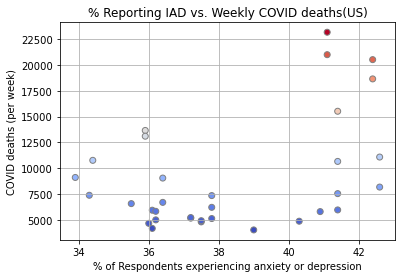

In [6]:
# Generate a scatter plot using IAD% and COVID Confirmed Cases in the US
x_axis = combined_df['US IAD%']
y_axis = combined_df['US Actual Deaths']
plt.scatter(x_axis,y_axis, c=y_axis, cmap='coolwarm',edgecolor='gray')

# add labels and title
plt.xlabel('% of Respondents experiencing anxiety or depression')
plt.ylabel('COVID deaths (per week)')
plt.title(f'% Reporting IAD vs. Weekly COVID deaths(US)')
plt.grid()
plt.savefig('mt_data/IAD_deaths_US_scatter.png')
plt.show()


## %IAD vs. COVID Deaths in US - linear regression

The r-value is:0.44.


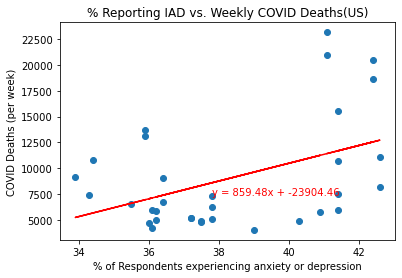

In [7]:
# Calculate the correlation coefficient and linear regression model 
# for IAD % and COVID confirmed cases in the US

correlation = st.pearsonr(combined_df['US IAD%'],combined_df['US Actual Deaths'])
print(f'The r-value is:{round(correlation[0],2)}.')

# Calculate the linear regression model for these two variables
x_values = combined_df['US IAD%']
y_values = combined_df['US Actual Deaths']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot the data on the scatter plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
# Annotate the regression line
# plt.annotate(line_eq,(20,37),fontsize=15,color="red")
plt.annotate(line_eq,(37.8,7350),fontsize=10,color="red")
plt.xlabel('% of Respondents experiencing anxiety or depression')
plt.ylabel('COVID Deaths (per week)')
plt.title(f'% Reporting IAD vs. Weekly COVID Deaths(US)')
# plt.grid()
plt.savefig('mt_data/IAD_deaths_US_regression.png')
plt.show()


## IAD% vs. Confirmed COVID Cases in New York State

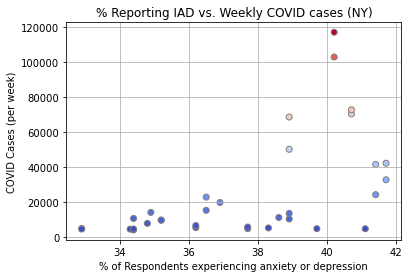

In [8]:
# Generate a scatter plot using IAD% and COVID Confirmed Cases in NY
x_axis = combined_df['NY IAD%']
y_axis = combined_df['NY Actual Cases']
plt.scatter(x_axis,y_axis, c=y_axis, cmap='coolwarm',edgecolor='gray')

# add labels and title
plt.xlabel('% of Respondents experiencing anxiety or depression')
plt.ylabel('COVID Cases (per week)')
plt.title(f'% Reporting IAD vs. Weekly COVID cases (NY)')
plt.grid()
plt.savefig('mt_data/IAD_cases_NY_scatter.png')
plt.show()


## %IAD vs. confirmed COVID in NY - linear regression

The r-value is:0.56.


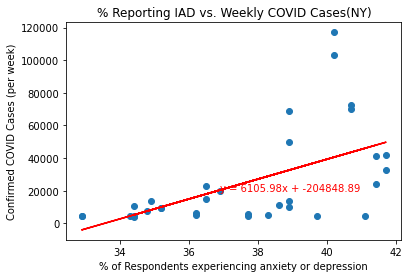

In [9]:
# Calculate the correlation coefficient and linear regression model 
# for IAD % and COVID confirmed cases in NY

correlation = st.pearsonr(combined_df['NY IAD%'],combined_df['NY Actual Cases'])
print(f'The r-value is:{round(correlation[0],2)}.')

# Calculate the linear regression model for these two variables
x_values = combined_df['NY IAD%']
y_values = combined_df['NY Actual Cases']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot the data on the scatter plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
# Annotate the regression line
# plt.annotate(line_eq,(20,37),fontsize=15,color="red")
plt.annotate(line_eq,(36.9,19702),fontsize=10,color="red")
plt.xlabel('% of Respondents experiencing anxiety or depression')
plt.ylabel('Confirmed COVID Cases (per week)')
plt.title(f'% Reporting IAD vs. Weekly COVID Cases(NY)')
# plt.grid()
plt.savefig('mt_data/IAD_cases_NY_regression.png')
plt.show()


## IAD% vs. Deaths in New York State

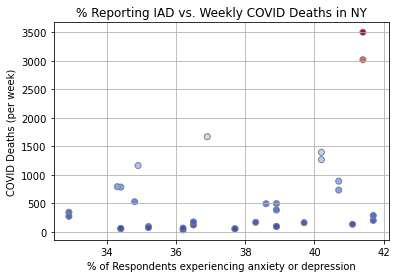

In [10]:
# Generate a scatter plot using IAD% and weekly COVID deaths in NY
x_axis = combined_df['NY IAD%']
y_axis = combined_df['NY Actual Deaths']
plt.scatter(x_axis,y_axis, c=y_axis, cmap='coolwarm',edgecolor='gray')

# add labels and title
plt.xlabel('% of Respondents experiencing anxiety or depression')
plt.ylabel('COVID Deaths (per week)')
plt.title(f'% Reporting IAD vs. Weekly COVID Deaths in NY')
plt.grid()
plt.savefig('mt_data/IAD_deaths_NY_scatter.png')
plt.show()


## %IAD vs. COVID Deaths in NY - linear regression

The r-value is:0.36.


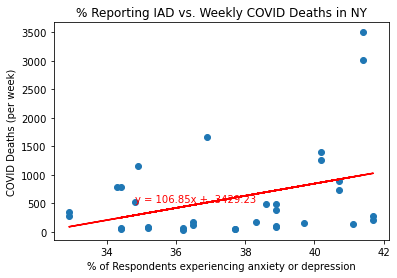

In [11]:
# Calculate the correlation coefficient and linear regression model 
# for IAD % and COVID confirmed cases in NY

correlation = st.pearsonr(combined_df['NY IAD%'],combined_df['NY Actual Deaths'])
print(f'The r-value is:{round(correlation[0],2)}.')

# Calculate the linear regression model for these two variables
x_values = combined_df['NY IAD%']
y_values = combined_df['NY Actual Deaths']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot the data on the scatter plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
# Annotate the regression line
# plt.annotate(line_eq,(20,37),fontsize=15,color="red")
plt.annotate(line_eq,(34.8,526),fontsize=10,color="red")
plt.xlabel('% of Respondents experiencing anxiety or depression')
plt.ylabel('COVID Deaths (per week)')
plt.title(f'% Reporting IAD vs. Weekly COVID Deaths in NY')
# plt.grid()
plt.savefig('mt_data/IAD_deaths_NY_regression.png')
plt.show()


## IAD% vs. Confirmed COVID Cases in California

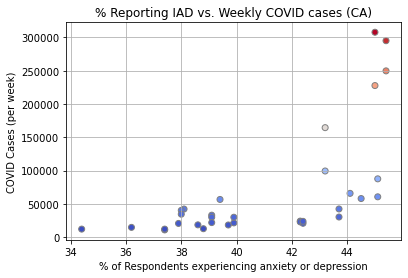

In [12]:
# Generate a scatter plot using IAD% and COVID Confirmed Cases in California
x_axis = combined_df['CA IAD%']
y_axis = combined_df['CA Actual Cases']
plt.scatter(x_axis,y_axis, c=y_axis, cmap='coolwarm',edgecolor='gray')

# add labels and title
plt.xlabel('% of Respondents experiencing anxiety or depression')
plt.ylabel('COVID Cases (per week)')
plt.title(f'% Reporting IAD vs. Weekly COVID cases (CA)')
plt.grid()
plt.savefig('mt_data/IAD_cases_CA_scatter.png')
plt.show()


## IAD% vs. Confirmed COVID Cases in CA - linear regression

The r-value is:0.64.


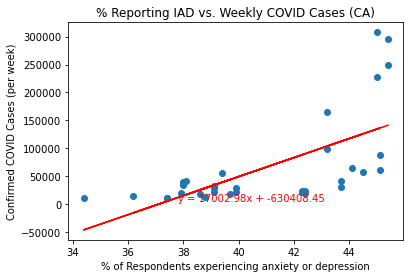

In [13]:
# Calculate the correlation coefficient and linear regression model 
# for IAD % and COVID confirmed cases in CA

correlation = st.pearsonr(combined_df['CA IAD%'],combined_df['CA Actual Cases'])
print(f'The r-value is:{round(correlation[0],2)}.')

# Calculate the linear regression model for these two variables
x_values = combined_df['CA IAD%']
y_values = combined_df['CA Actual Cases']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot the data on the scatter plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
# Annotate the regression line
# plt.annotate(line_eq,(20,37),fontsize=15,color="red")
plt.annotate(line_eq,(37.8,5128),fontsize=10,color="red")
plt.xlabel('% of Respondents experiencing anxiety or depression')
plt.ylabel('Confirmed COVID Cases (per week)')
plt.title(f'% Reporting IAD vs. Weekly COVID Cases (CA)')
# plt.grid()
plt.savefig('mt_data/IAD_Cases_CA_regression.png')
plt.show()


## IAD% vs. Deaths in California

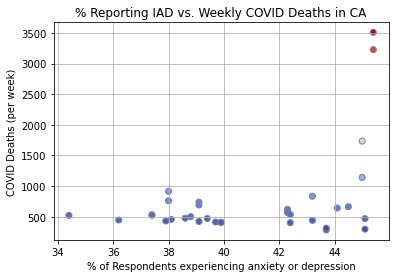

In [14]:
# Generate a scatter plot using IAD% and weekly COVID deaths in NY
x_axis = combined_df['CA IAD%']
y_axis = combined_df['CA Actual Deaths']
plt.scatter(x_axis,y_axis, c=y_axis, cmap='coolwarm',edgecolor='gray')

# add labels and title
plt.xlabel('% of Respondents experiencing anxiety or depression')
plt.ylabel('COVID Deaths (per week)')
plt.title(f'% Reporting IAD vs. Weekly COVID Deaths in CA')
plt.grid()
plt.savefig('mt_data/IAD_deaths_CA_scatter.png')
plt.show()


## %IAD vs. COVID Deaths in CA - linear regression

The r-value is:0.41.


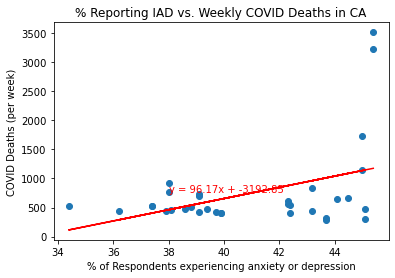

In [15]:
# Calculate the correlation coefficient and linear regression model 
# for IAD % and COVID confirmed cases

correlation = st.pearsonr(combined_df['CA IAD%'],combined_df['CA Actual Deaths'])
print(f'The r-value is:{round(correlation[0],2)}.')

# Calculate the linear regression model for these two variables
x_values = combined_df['CA IAD%']
y_values = combined_df['CA Actual Deaths']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot the data on the scatter plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
# Annotate the regression line
# plt.annotate(line_eq,(20,37),fontsize=15,color="red")
plt.annotate(line_eq,(38.0,761),fontsize=10,color="red")
plt.xlabel('% of Respondents experiencing anxiety or depression')
plt.ylabel('COVID Deaths (per week)')
plt.title(f'% Reporting IAD vs. Weekly COVID Deaths in CA')
# plt.grid()
plt.savefig('mt_data/IAD_deaths_CA_regression.png')
plt.show()
